C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_discretization.py:397: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(


=== Reporte de Clasificación: Red Bayesiana (CategoricalNB) ===
                 precision    recall  f1-score   support

     Derivación       0.42      0.28      0.33      3509
      Domicilio       0.89      0.93      0.91     21235
Hospitalización       0.44      0.47      0.45      2118

       accuracy                           0.81     26862
      macro avg       0.58      0.56      0.57     26862
   weighted avg       0.79      0.81      0.80     26862



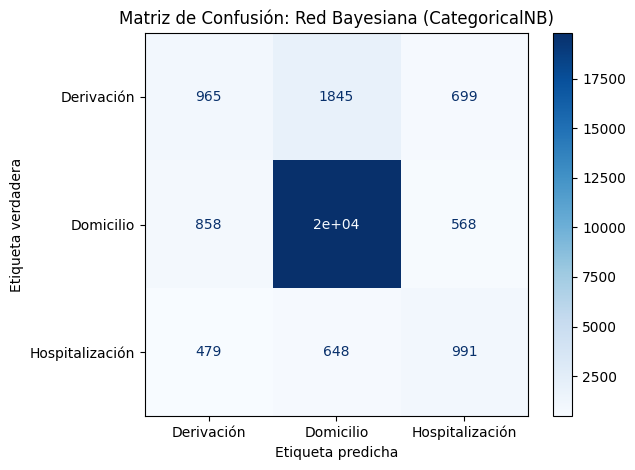

In [1]:
# ============================================================
# Red Bayesiana (Naive Bayes categórico) para predecir "Destino"
# ============================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# -----------------------------
# 1) Configuración
# -----------------------------
RANDOM_STATE = 10
DATA_FILE = "databases/basedatos_202507161527.csv"

NUMERIC_COLS = ["Temperatura", "Pulso", "PAS", "PAD", "SatO2", "Edad"]
CATEGORICAL_COLS = [
    "Temperatura_cat", "Pulso_cat", "PAS_cat", "PAD_cat",
    "SatO2_cat", "Edad_cat", "Sexo", "Triage", "Destino"
]
TARGET_COL = "Destino"

# -----------------------------
# 2) Funciones auxiliares
# -----------------------------
def discretize_numeric(df, numeric_cols, n_bins=5, strategy="quantile"):
    """
    Discretiza columnas numéricas en categorías 0..n_bins-1.
    """
    df = df.copy()
    transformer = KBinsDiscretizer(n_bins=n_bins, encode="ordinal", strategy=strategy)
    X_num = transformer.fit_transform(df[numeric_cols])
    df[numeric_cols] = np.asarray(X_num, dtype=int)
    return df, transformer

def encode_categoricals(df, cat_cols, exclude_target=True):
    """
    Codifica columnas categóricas en enteros (OrdinalEncoder).
    """
    df = df.copy()
    cols_to_encode = [c for c in cat_cols if c in df.columns and (c != TARGET_COL or not exclude_target)]
    enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
    df[cols_to_encode] = enc.fit_transform(df[cols_to_encode])
    df[cols_to_encode] = df[cols_to_encode].astype(int)
    return df, enc

# -----------------------------
# 3) Flujo principal
# -----------------------------
def main():
    # Leer archivo
    df = pd.read_csv(DATA_FILE)

    # Eliminar filas con valores faltantes
    df = df.dropna().reset_index(drop=True)

    # Discretizar numéricas
    df_disc, disc_transformer = discretize_numeric(df, NUMERIC_COLS, n_bins=5, strategy="quantile")

    # Codificar categóricas (excepto target)
    df_enc, cat_encoder = encode_categoricals(df_disc, CATEGORICAL_COLS, exclude_target=True)

    # Preparar X e y
    X = df_enc[NUMERIC_COLS + [c for c in CATEGORICAL_COLS if c != TARGET_COL]].copy()
    y = df_enc[TARGET_COL] if TARGET_COL in df_enc.columns else df[TARGET_COL]

    # Codificar target
    le_target = LabelEncoder()
    y_enc = le_target.fit_transform(y.astype(str))

    # Entrenamiento / prueba
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_enc, test_size=0.30, stratify=y_enc, random_state=RANDOM_STATE
    )

    # Modelo Naive Bayes categórico
    model = CategoricalNB()
    model.fit(X_train, y_train)

    # Predicción
    y_pred = model.predict(X_test)

    # Reporte
    print("=== Reporte de Clasificación: Red Bayesiana (CategoricalNB) ===")
    print(classification_report(y_test, y_pred, target_names=le_target.classes_))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_target.classes_)
    disp.plot(cmap="Blues")
    plt.title("Matriz de Confusión: Red Bayesiana (CategoricalNB)")
    plt.xlabel("Etiqueta predicha")
    plt.ylabel("Etiqueta verdadera")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()



=== MATRIZ DE CORRELACIÓN (variables numéricas) ===
             Temperatura     Pulso       PAS       PAD     SatO2      Edad
Temperatura     1.000000  0.258843 -0.040167 -0.027401 -0.041990 -0.097853
Pulso           0.258843  1.000000 -0.015903  0.141407 -0.132200 -0.149514
PAS            -0.040167 -0.015903  1.000000  0.643651 -0.026947  0.293562
PAD            -0.027401  0.141407  0.643651  1.000000 -0.008529  0.086281
SatO2          -0.041990 -0.132200 -0.026947 -0.008529  1.000000 -0.257071
Edad           -0.097853 -0.149514  0.293562  0.086281 -0.257071  1.000000


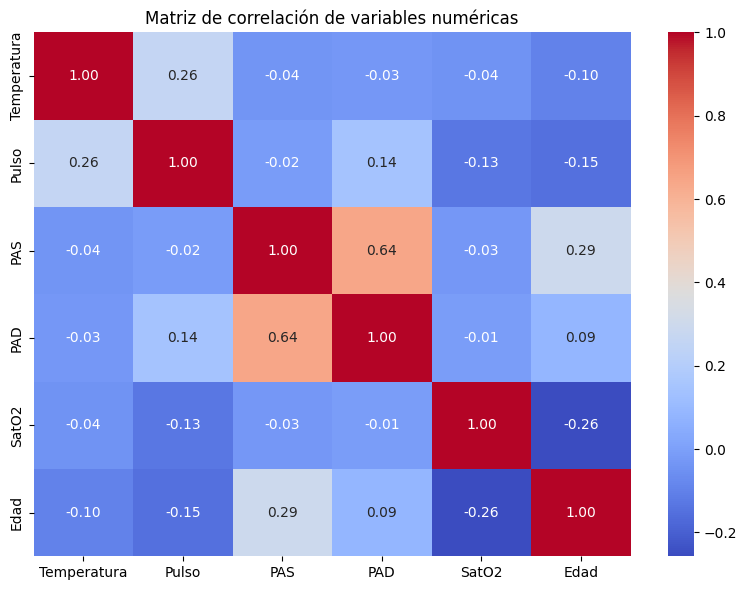

C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_discretization.py:397: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(



=== PROBABILIDADES CONDICIONALES P(variable | Destino) ===

--- Variable: Temperatura ---
Destino = Derivación → 0.097, 0.363, 0.158, 0.103, 0.279
Destino = Domicilio → 0.074, 0.232, 0.281, 0.126, 0.287
Destino = Hospitalización → 0.097, 0.350, 0.153, 0.098, 0.301

--- Variable: Pulso ---
Destino = Derivación → 0.208, 0.162, 0.176, 0.183, 0.271
Destino = Domicilio → 0.198, 0.187, 0.223, 0.208, 0.185
Destino = Hospitalización → 0.192, 0.157, 0.160, 0.181, 0.310

--- Variable: PAS ---
Destino = Derivación → 0.246, 0.163, 0.182, 0.181, 0.229
Destino = Domicilio → 0.182, 0.189, 0.222, 0.207, 0.200
Destino = Hospitalización → 0.273, 0.154, 0.192, 0.167, 0.214

--- Variable: PAD ---
Destino = Derivación → 0.241, 0.178, 0.168, 0.189, 0.225
Destino = Domicilio → 0.180, 0.202, 0.193, 0.227, 0.199
Destino = Hospitalización → 0.266, 0.177, 0.158, 0.196, 0.203

--- Variable: SatO2 ---
Destino = Derivación → 0.213, 0.132, 0.219, 0.436
Destino = Domicilio → 0.084, 0.114, 0.248, 0.553
Destino = Hosp

In [2]:
# ============================================================
# Análisis de correlaciones y probabilidades condicionales
# Red Bayesiana (Naive Bayes Categórico)
# ============================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, KBinsDiscretizer
from sklearn.naive_bayes import CategoricalNB

# -----------------------------
# 1) Configuración
# -----------------------------
RANDOM_STATE = 42
DATA_FILE = "databases/basedatos_202507161527.csv"

NUMERIC_COLS = ["Temperatura", "Pulso", "PAS", "PAD", "SatO2", "Edad"]
CATEGORICAL_COLS = [
    "Temperatura_cat", "Pulso_cat", "PAS_cat", "PAD_cat",
    "SatO2_cat", "Edad_cat", "Sexo", "Triage", "Destino"
]
TARGET_COL = "Destino"

# -----------------------------
# 2) Funciones auxiliares
# -----------------------------
def discretize_numeric(df, numeric_cols, n_bins=5, strategy="quantile"):
    """
    Discretiza columnas numéricas en categorías 0..n_bins-1.
    """
    df = df.copy()
    transformer = KBinsDiscretizer(n_bins=n_bins, encode="ordinal", strategy=strategy)
    X_num = transformer.fit_transform(df[numeric_cols])
    df[numeric_cols] = np.asarray(X_num, dtype=int)
    return df, transformer

def encode_categoricals(df, cat_cols, exclude_target=True):
    """
    Codifica columnas categóricas en enteros (OrdinalEncoder).
    """
    df = df.copy()
    cols_to_encode = [c for c in cat_cols if c in df.columns and (c != TARGET_COL or not exclude_target)]
    enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
    df[cols_to_encode] = enc.fit_transform(df[cols_to_encode])
    df[cols_to_encode] = df[cols_to_encode].astype(int)
    return df, enc

# -----------------------------
# 3) Flujo principal
# -----------------------------
def main():
    # Leer archivo
    df = pd.read_csv(DATA_FILE)

    # Eliminar filas con valores faltantes
    df = df.dropna().reset_index(drop=True)

    # ==============================
    # PARTE 1: MATRIZ DE CORRELACIÓN
    # ==============================
    print("\n=== MATRIZ DE CORRELACIÓN (variables numéricas) ===")
    corr_matrix = df[NUMERIC_COLS].corr()
    print(corr_matrix)

    # Heatmap gráfico
    plt.figure(figsize=(8,6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Matriz de correlación de variables numéricas")
    plt.tight_layout()
    plt.show()

    # ==============================
    # PARTE 2: PROBABILIDADES CONDICIONALES (CategoricalNB)
    # ==============================

    # Discretizar numéricas
    df_disc, disc_transformer = discretize_numeric(df, NUMERIC_COLS, n_bins=5, strategy="quantile")

    # Codificar categóricas (excepto target)
    df_enc, cat_encoder = encode_categoricals(df_disc, CATEGORICAL_COLS, exclude_target=True)

    # Preparar X e y
    X = df_enc[NUMERIC_COLS + [c for c in CATEGORICAL_COLS if c != TARGET_COL]].copy()
    y = df[TARGET_COL]  # usamos el valor original para mejor interpretación

    # Codificar target
    le_target = LabelEncoder()
    y_enc = le_target.fit_transform(y.astype(str))

    # Entrenamiento
    model = CategoricalNB()
    model.fit(X, y_enc)

    # Probabilidades condicionales
    print("\n=== PROBABILIDADES CONDICIONALES P(variable | Destino) ===")
    feature_names = X.columns.tolist()
    class_labels = le_target.classes_

    for var_idx, var_name in enumerate(feature_names):
        print(f"\n--- Variable: {var_name} ---")
        for class_idx, class_name in enumerate(class_labels):
            probs = np.exp(model.feature_log_prob_[var_idx][class_idx])
            probs_str = ", ".join([f"{p:.3f}" for p in probs])
            print(f"Destino = {class_name} → {probs_str}")

if __name__ == "__main__":
    main()


In [4]:
# ============================================================
# Probabilidades condicionales en formato TABLA
# con nombres de categorías originales y rangos en numéricas
# ============================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, KBinsDiscretizer
from sklearn.naive_bayes import CategoricalNB

# -----------------------------
# Configuración
# -----------------------------
RANDOM_STATE = 42
DATA_FILE = "databases/basedatos_202507161527.csv"

NUMERIC_COLS = ["Temperatura", "Pulso", "PAS", "PAD", "SatO2", "Edad"]
CATEGORICAL_COLS = [
    "Temperatura_cat", "Pulso_cat", "PAS_cat", "PAD_cat",
    "SatO2_cat", "Edad_cat", "Sexo", "Triage", "Destino"
]
TARGET_COL = "Destino"

# -----------------------------
# Funciones auxiliares
# -----------------------------
def discretize_numeric(df, numeric_cols, n_bins=5, strategy="quantile"):
    """Discretiza numéricas y devuelve también los rangos de cada bin"""
    df = df.copy()
    transformer = KBinsDiscretizer(n_bins=n_bins, encode="ordinal", strategy=strategy)
    X_num = transformer.fit_transform(df[numeric_cols])
    df[numeric_cols] = np.asarray(X_num, dtype=int)

    # Guardar etiquetas con rangos
    bin_labels = {}
    for i, col in enumerate(numeric_cols):
        edges = transformer.bin_edges_[i]
        labels = []
        for j in range(len(edges) - 1):
            labels.append(f"[{edges[j]:.1f} – {edges[j+1]:.1f}]")
        bin_labels[col] = labels
    return df, transformer, bin_labels

def encode_categoricals(df, cat_cols, exclude_target=True):
    df = df.copy()
    cols_to_encode = [c for c in cat_cols if c in df.columns and (c != TARGET_COL or not exclude_target)]
    enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
    df[cols_to_encode] = enc.fit_transform(df[cols_to_encode])
    df[cols_to_encode] = df[cols_to_encode].astype(int)
    return df, enc

# -----------------------------
# Flujo principal
# -----------------------------
def main():
    df = pd.read_csv(DATA_FILE)
    df = df.dropna().reset_index(drop=True)

    # Discretizar numéricas
    df_disc, disc_transformer, bin_labels = discretize_numeric(df, NUMERIC_COLS, n_bins=5, strategy="quantile")

    # Codificar categóricas (excepto target)
    df_enc, cat_encoder = encode_categoricals(df_disc, CATEGORICAL_COLS, exclude_target=True)

    # Preparar X e y
    X = df_enc[NUMERIC_COLS + [c for c in CATEGORICAL_COLS if c != TARGET_COL]].copy()
    y = df[TARGET_COL]
    le_target = LabelEncoder()
    y_enc = le_target.fit_transform(y.astype(str))

    # Entrenar modelo
    model = CategoricalNB()
    model.fit(X, y_enc)

    feature_names = X.columns.tolist()
    class_labels = le_target.classes_

    print("\n=== PROBABILIDADES CONDICIONALES P(variable | Destino) ===")
    for var_idx, var_name in enumerate(feature_names):
        # Probabilidades log → exp
        probs = np.exp(model.feature_log_prob_[var_idx])

        # Determinar nombres de columnas según sea numérica o categórica
        if var_name in NUMERIC_COLS:
            col_names = bin_labels[var_name]
        else:
            # índice de variable categórica dentro del encoder
            cat_idx = [i for i, c in enumerate(cat_encoder.feature_names_in_) if c == var_name][0]
            col_names = list(cat_encoder.categories_[cat_idx])

        # Crear tabla
        df_probs = pd.DataFrame(
            probs,
            index=class_labels,
            columns=col_names
        )
        df_probs.index.name = "Destino"

        print(f"\n--- Variable: {var_name} ---")
        print(df_probs.round(3))  # redondeamos a 3 decimales

if __name__ == "__main__":
    main()


C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_discretization.py:397: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(



=== PROBABILIDADES CONDICIONALES P(variable | Destino) ===

--- Variable: Temperatura ---
                 [32.4 – 36.0]  [36.0 – 36.2]  [36.2 – 36.4]  [36.4 – 36.5]  \
Destino                                                                       
Derivación               0.097          0.363          0.158          0.103   
Domicilio                0.074          0.232          0.281          0.126   
Hospitalización          0.097          0.350          0.153          0.098   

                 [36.5 – 41.0]  
Destino                         
Derivación               0.279  
Domicilio                0.287  
Hospitalización          0.301  

--- Variable: Pulso ---
                 [25.0 – 73.0]  [73.0 – 81.0]  [81.0 – 90.0]  [90.0 – 101.0]  \
Destino                                                                        
Derivación               0.208          0.162          0.176           0.183   
Domicilio                0.198          0.187          0.223           0.208   
Hos